In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import os
if not os.path.exists("images"):
    os.mkdir("images")
import plotly
import pygal as py
import folium
from folium.plugins import HeatMap
import plotly.express as px
from IPython.display import Image
sns.set(style="darkgrid")

In [2]:
url = 'https://raw.githubusercontent.com/microsoft/Bing-COVID-19-Data/master/data/Bing-COVID19-Data.csv'

In [3]:
df = pd.read_csv(url, error_bad_lines=False)

In [4]:
df = df.rename(columns={'Confirmed': 'Confirmed_Cases', 'ConfirmedChange': 'New_Confirmed_Cases',
                        'DeathsChange' : 'New_Deaths', 'AdminRegion1' : 'State'})
df['datetime'] = pd.to_datetime(df['Updated'])
df = df.set_index('datetime')
df.drop(['Updated'], axis=1, inplace=True)

In [5]:
from datetime import datetime
Today = datetime.today().strftime('%Y-%m-%d')

In [6]:
WORLDdf = df[(df['Country_Region'] == "Worldwide")]
WORLDdf = WORLDdf[pd.isnull(WORLDdf['State'])]
WORLDdf = WORLDdf.loc['2020-3-1': Today]
USdf = df[(df['Country_Region'] == "United States")]
USdf = USdf[pd.isnull(USdf['State'])]
USdf = USdf.loc['2020-3-1': Today]
ALLdf = df[(df['Country_Region'] != "Worldwide")]
ALLdf = ALLdf[pd.isnull(ALLdf['State'])]
ALLdf = ALLdf.loc['2020-3-1': Today]

In [7]:
USdf.tail()

,ID,Confirmed_Cases,New_Confirmed_Cases,Deaths,New_Deaths,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,State,AdminRegion2
datetime,,,,,,,,,,,,,,
2020-05-14,16277940,1407531,26776.0,79899.0,1858.0,251464.0,8080.0,39.49591,-98.98998,US,USA,United States,NaN,NaN
2020-05-15,16277941,1432899,25368.0,81423.0,1524.0,259038.0,7574.0,39.49591,-98.98998,US,USA,United States,NaN,NaN
2020-05-16,16277942,1457426,24527.0,82654.0,1231.0,272386.0,13348.0,39.49591,-98.98998,US,USA,United States,NaN,NaN
2020-05-17,16277944,1477157,19731.0,83439.0,785.0,281192.0,8806.0,39.49591,-98.98998,US,USA,United States,NaN,NaN
2020-05-18,16277946,1498444,21287.0,84321.0,882.0,288842.0,7650.0,39.49591,-98.98998,US,USA,United States,NaN,NaN


In [8]:
WORLDdf.tail()

,ID,Confirmed_Cases,New_Confirmed_Cases,Deaths,New_Deaths,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,State,AdminRegion2
datetime,,,,,,,,,,,,,,
2020-05-13,14064683,4336973,103469.0,296252.0,6320.0,1540464.0,59150.0,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
2020-05-14,14494766,4434590,97617.0,301937.0,5685.0,1583929.0,43465.0,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
2020-05-15,14923458,4531811,97221.0,307001.0,5064.0,1632286.0,48357.0,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
2020-05-16,15332735,4626632,94821.0,311363.0,4362.0,1679428.0,47142.0,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN
2020-05-17,15763695,4710614,83982.0,315023.0,3660.0,1732344.0,52916.0,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN


In [9]:
ALLdf.head()

,ID,Confirmed_Cases,New_Confirmed_Cases,Deaths,New_Deaths,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,State,AdminRegion2
datetime,,,,,,,,,,,,,,
2020-03-01,340561,1,0.0,0.0,0.0,NaN,NaN,33.83114,66.02471,AF,AFG,Afghanistan,NaN,NaN
2020-03-02,340562,1,0.0,0.0,0.0,NaN,NaN,33.83114,66.02471,AF,AFG,Afghanistan,NaN,NaN
2020-03-03,340563,1,0.0,0.0,0.0,NaN,NaN,33.83114,66.02471,AF,AFG,Afghanistan,NaN,NaN
2020-03-04,340564,1,0.0,0.0,0.0,NaN,NaN,33.83114,66.02471,AF,AFG,Afghanistan,NaN,NaN
2020-03-05,340565,1,0.0,0.0,0.0,NaN,NaN,33.83114,66.02471,AF,AFG,Afghanistan,NaN,NaN


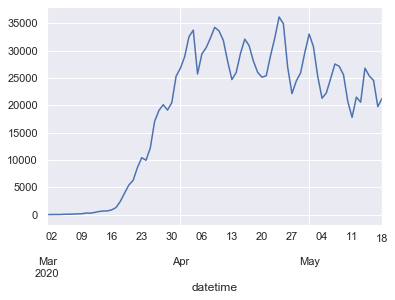

In [10]:
y = USdf.New_Confirmed_Cases
y.plot()

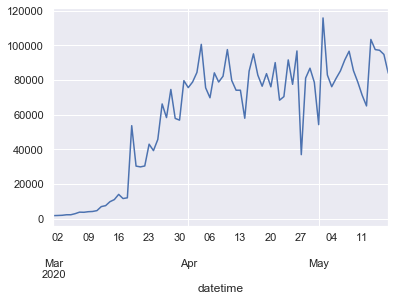

In [11]:
y = WORLDdf.New_Confirmed_Cases
y.plot()

In [12]:
MAPdfCASES = ALLdf.groupby(['ISO3', 'Country_Region'])['New_Confirmed_Cases'].sum().reset_index(name ='Total Cases')
MAPdfDEATHS = ALLdf.groupby(['ISO3', 'Country_Region'])['New_Deaths'].sum().reset_index(name ='Total Deaths')

,ISO3,Country_Region,Total Deaths
0,ABW,Aruba,3.0
1,AFG,Afghanistan,169.0
2,AGO,Angola,2.0
3,AIA,Anguilla,0.0
4,ALB,Albania,31.0


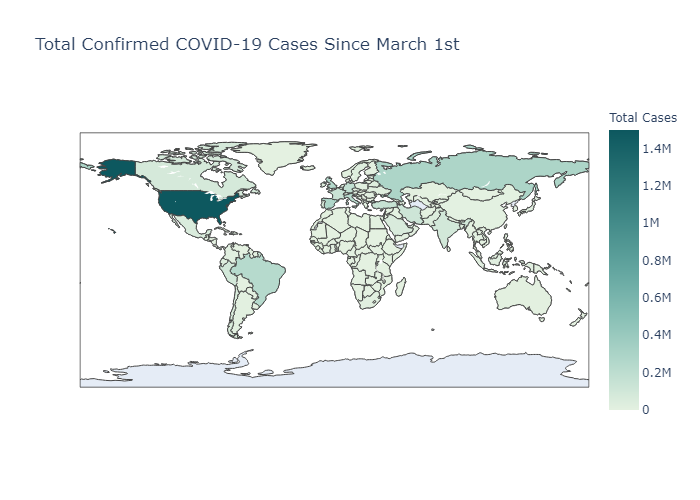

In [22]:
fig = px.choropleth(MAPdfCASES, locations="ISO3",
                    color="Total Cases", 
                    hover_name="Country_Region", 
                    color_continuous_scale='mint',
                   title="Total Confirmed COVID-19 Cases Since March 1st")
figpng = fig.to_image(format="png")
Image(figpng)

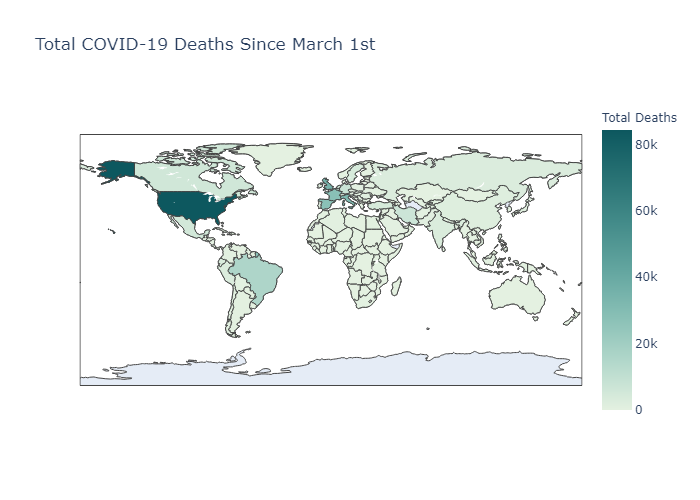

In [16]:
fig2 = px.choropleth(MAPdfDEATHS, locations="ISO3",
                    color="Total Deaths", 
                    hover_name="Country_Region", 
                    color_continuous_scale='mint',
                    title="Total COVID-19 Deaths Since March 1st")
fig2png = fig2.to_image(format="png")
Image(fig2png)